## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_single_user_balanced_pattern_v3.csv")

# Convert timestamp to datetime and extract additional information
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5
df['day'] = df['timestamp'].dt.date

# Set the style for seaborn
sns.set(style="whitegrid")


## Distribution of Service Group

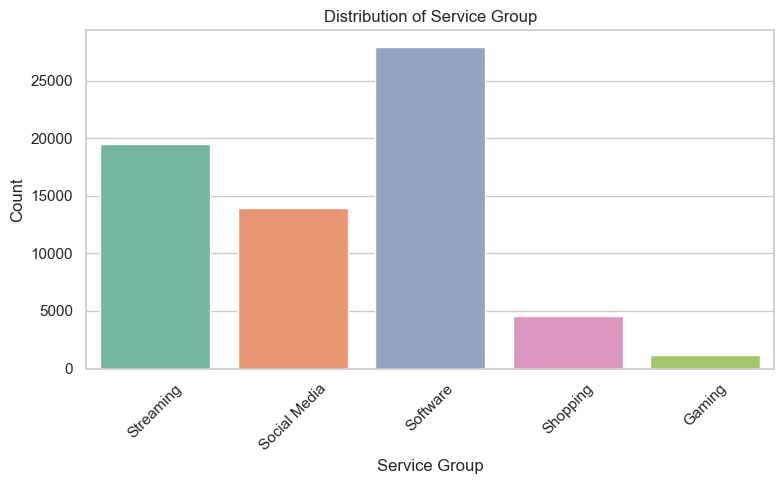

In [2]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='service_group', palette="Set2")
plt.title('Distribution of Service Group')
plt.xlabel('Service Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("distribution_service_group.png")
plt.show()


In [3]:
## Count of Each Service Group by Day of the Week

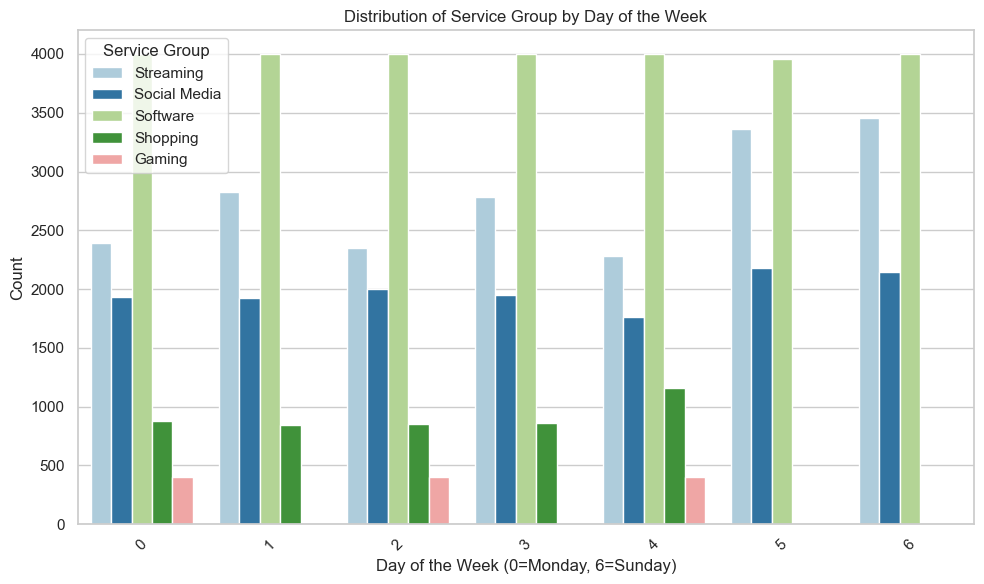

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='service_group', palette="Paired")
plt.title('Distribution of Service Group by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Service Group')
plt.tight_layout()
#plt.savefig("service_group_by_day_of_week.png")
plt.show()


In [5]:
## Heatmap of Usage by Hour and Service Group

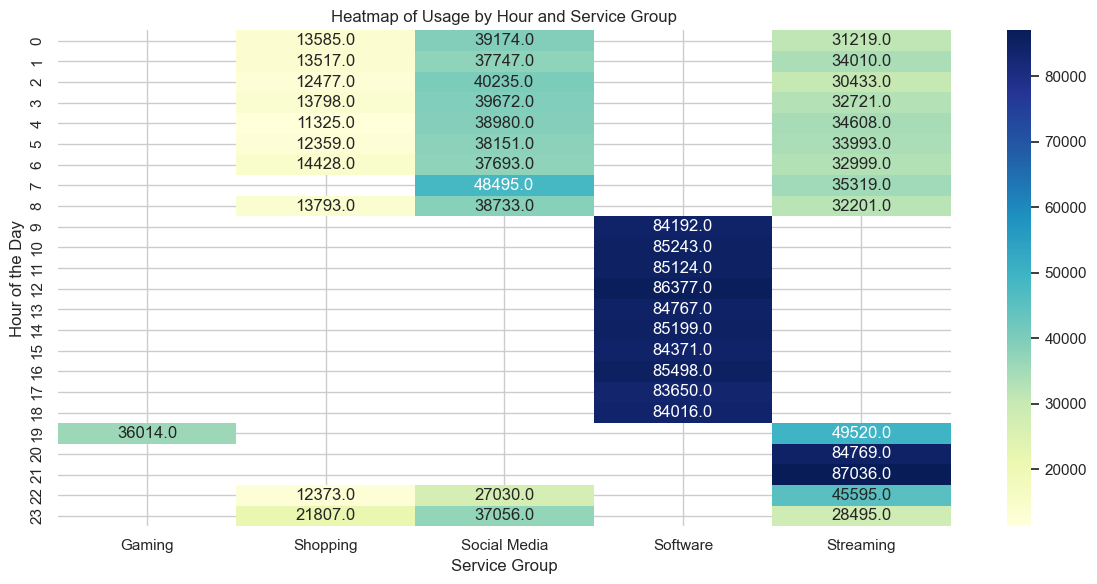

In [6]:
plt.figure(figsize=(12, 6))
usage_by_hour_group = df.pivot_table(values='usage_minutes', index='hour', columns='service_group', aggfunc='sum')
sns.heatmap(usage_by_hour_group, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Usage by Hour and Service Group')
plt.xlabel('Service Group')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.savefig("usage_heatmap_hour_service_group.png")
plt.show()


In [7]:
## Box Plot of Usage Across Different Times of Day

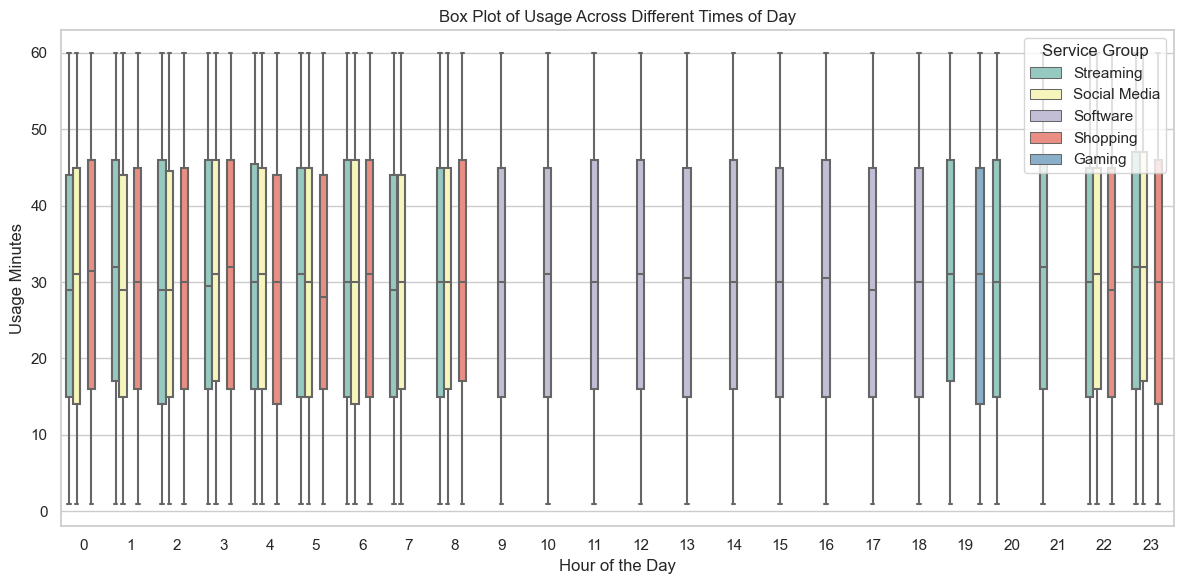

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='usage_minutes', hue='service_group', palette="Set3")
plt.title('Box Plot of Usage Across Different Times of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Usage Minutes')
plt.legend(title='Service Group', loc='upper right')
plt.tight_layout()
#plt.savefig("boxplot_usage_time_service_group.png")
plt.show()



## Service Name vs Days


<Figure size 1600x800 with 0 Axes>

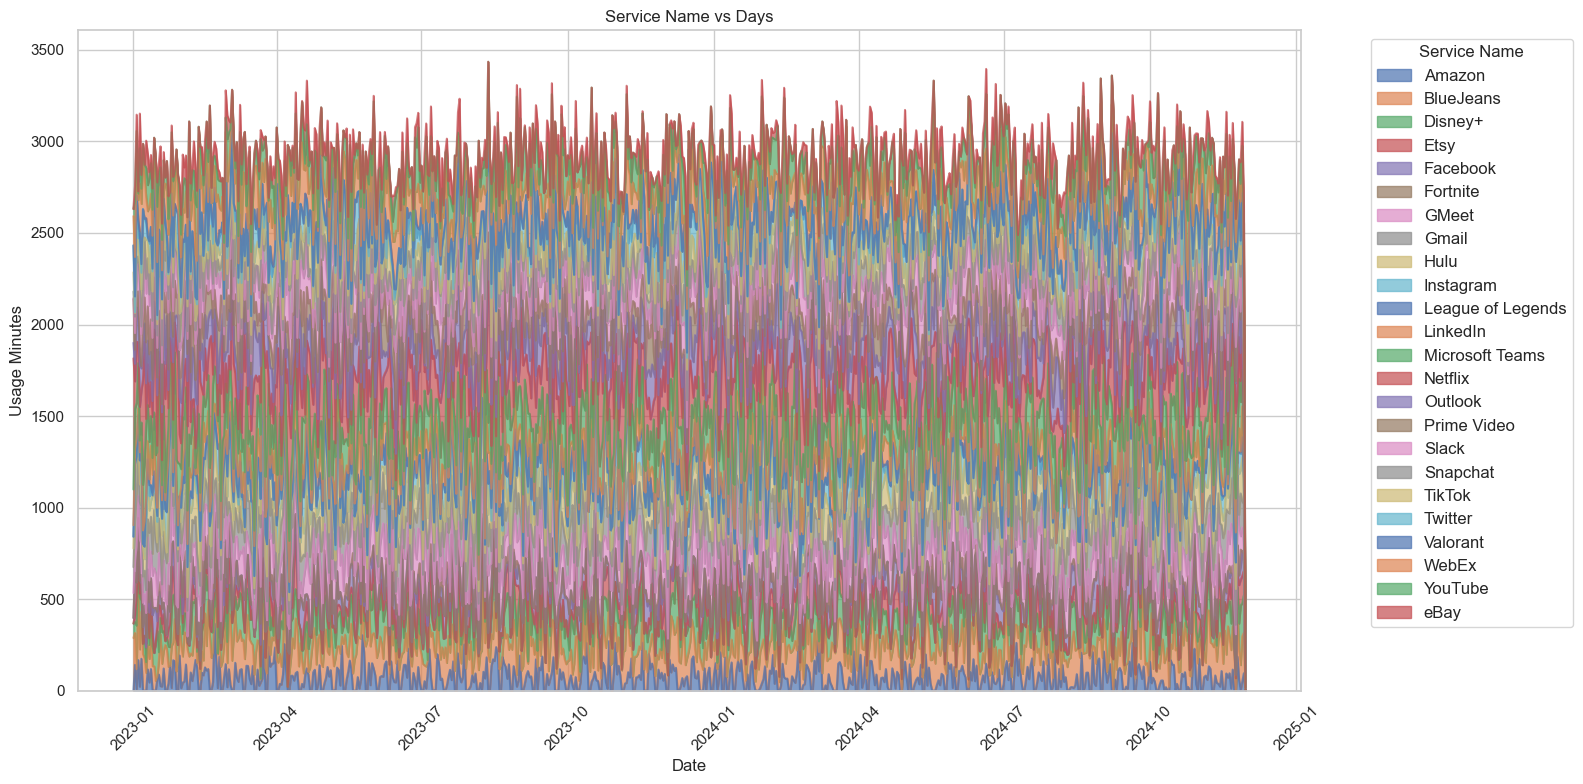

In [9]:
plt.figure(figsize=(16, 8))

# Group the data and plot as a stacked area plot
df_daily_service = df.groupby(['day', 'service_name'])['usage_minutes'].sum().unstack()
df_daily_service.plot.area(title="Service Name vs Days", ylabel="Usage Minutes", alpha=0.7, figsize=(16, 8))

# Move legend outside the plot
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("service_name_vs_days_area_plot.png")
plt.show()


In [10]:
## Service Name vs Hour

<Figure size 1800x1000 with 0 Axes>

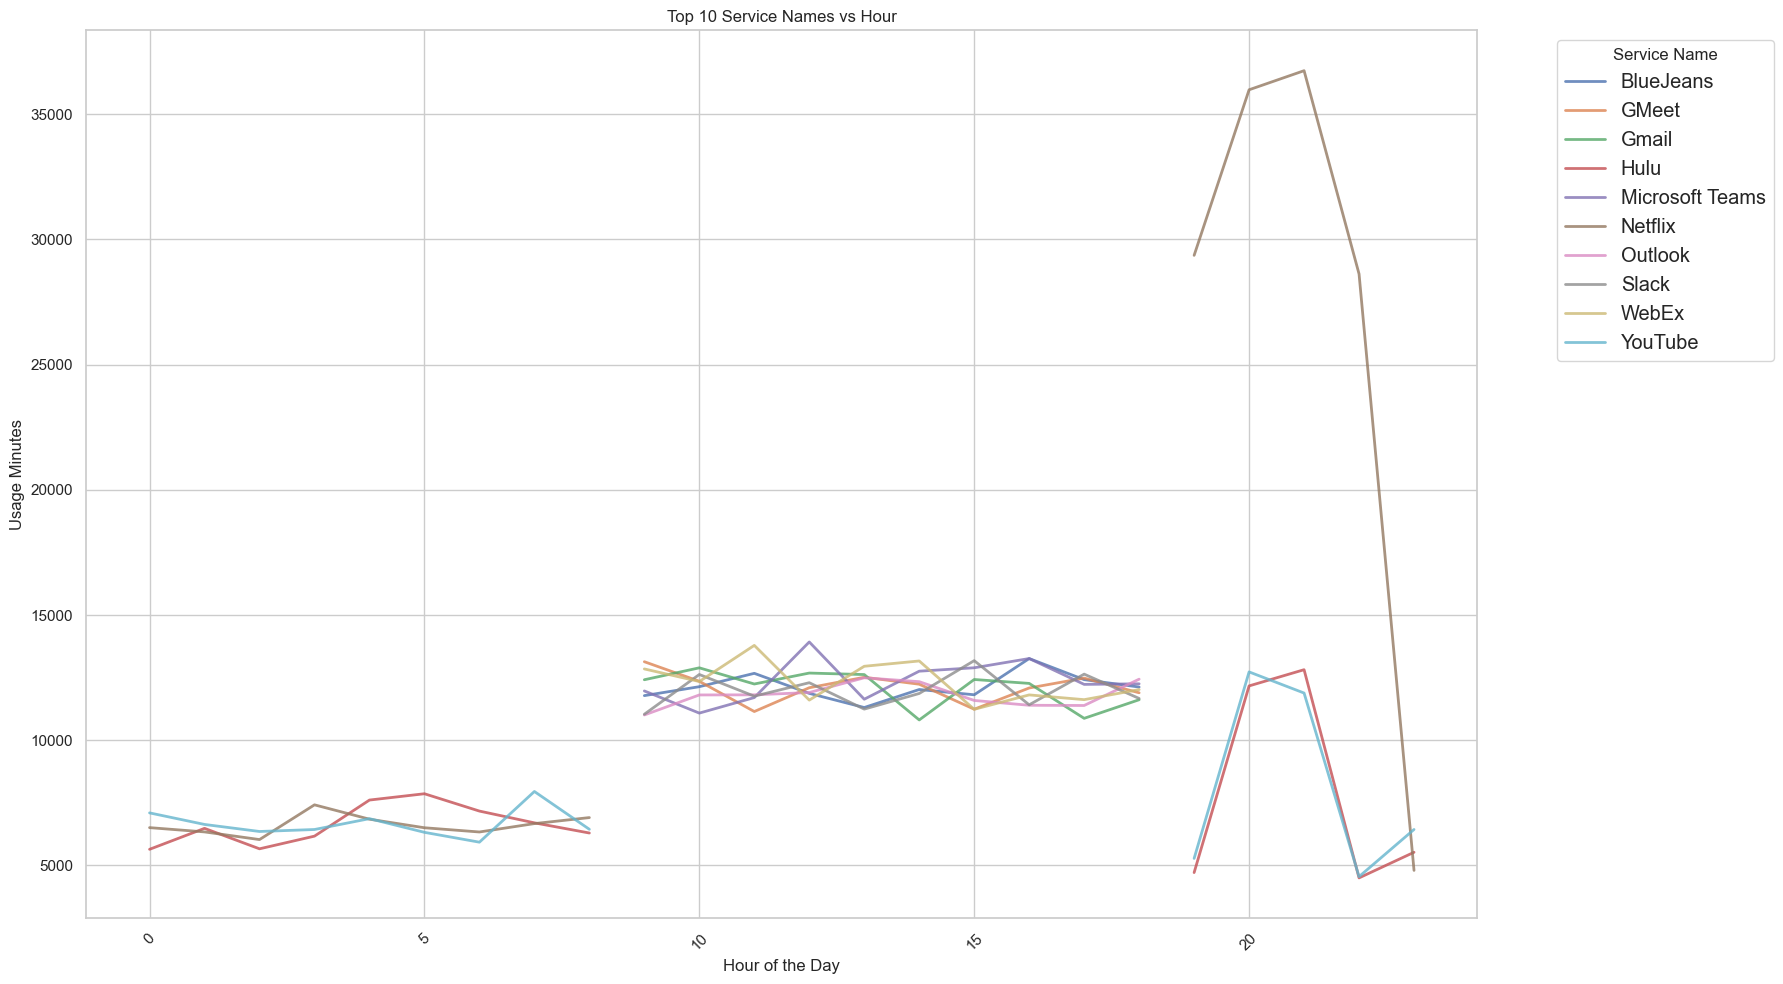

In [11]:
# Top 10 Service Names vs Hour 

# Select top 10 service names based on total usage to reduce clutter
top_services = df.groupby('service_name')['usage_minutes'].sum().nlargest(10).index
filtered_df = df[df['service_name'].isin(top_services)]

# Increase figure size for readability
plt.figure(figsize=(18, 10))

# Group and plot data
filtered_df.groupby(['hour', 'service_name'])['usage_minutes'].sum().unstack().plot(
    title="Top 10 Service Names vs Hour", ylabel="Usage Minutes", linewidth=2, alpha=0.8, figsize=(18, 10)
)

# legend outside the plot
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
plt.xlabel("Hour of the Day")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("service_name_vs_hour_large.png")
plt.show()


In [12]:

## Service Name vs Weekends


<Figure size 1400x800 with 0 Axes>

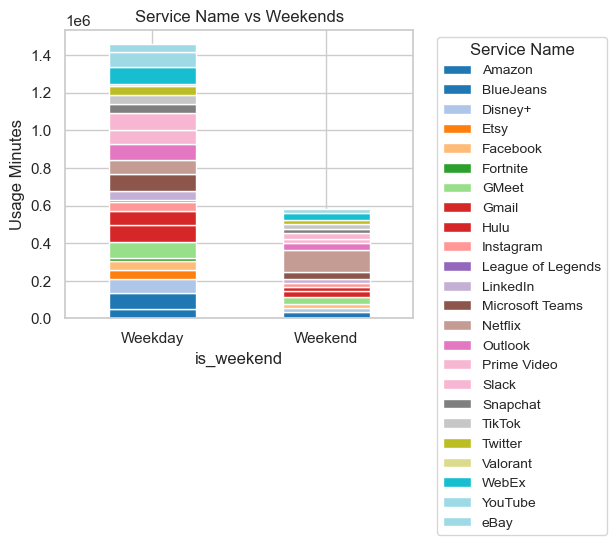

In [13]:
plt.figure(figsize=(14, 8))  # Increase figure size
df.groupby(['is_weekend', 'service_name'])['usage_minutes'].sum().unstack().plot(
    kind='bar', stacked=True, title="Service Name vs Weekends", ylabel="Usage Minutes", colormap="tab20"
)
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)

# Move the legend outside the plot and adjust font size
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
#plt.savefig("service_name_vs_weekends_improved.png")
plt.show()


In [14]:
## Service Group vs Days

<Figure size 1200x600 with 0 Axes>

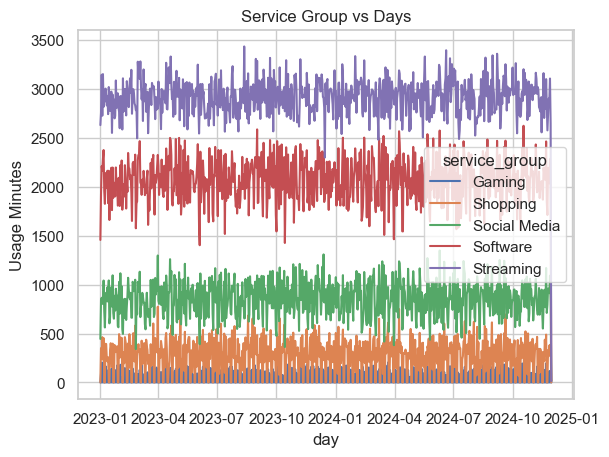

In [15]:
plt.figure(figsize=(12, 6))
df.groupby(['day', 'service_group'])['usage_minutes'].sum().unstack().plot(title="Service Group vs Days", ylabel="Usage Minutes", stacked=True)
#plt.savefig("service_group_vs_days.png")
plt.show()


In [16]:
## Service Group vs Hour


<Figure size 1400x800 with 0 Axes>

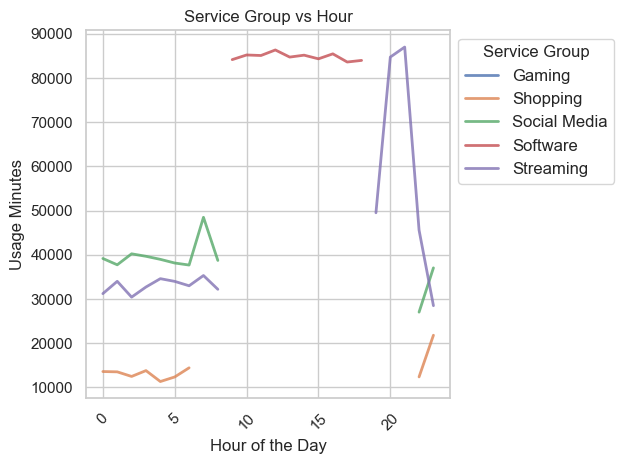

In [17]:
# Improved Plot: Service Group vs Hour
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Group and plot data
df.groupby(['hour', 'service_group'])['usage_minutes'].sum().unstack().plot(
    title="Service Group vs Hour", ylabel="Usage Minutes", linewidth=2, alpha=0.8
)

# legend outside the plot 
plt.legend(title='Service Group', bbox_to_anchor=(1.0004, 1), loc='upper left', fontsize='medium')
plt.xlabel("Hour of the Day")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("service_group_vs_hour.png")
plt.show()


In [18]:
## Service Group vs Weekends

<Figure size 1200x600 with 0 Axes>

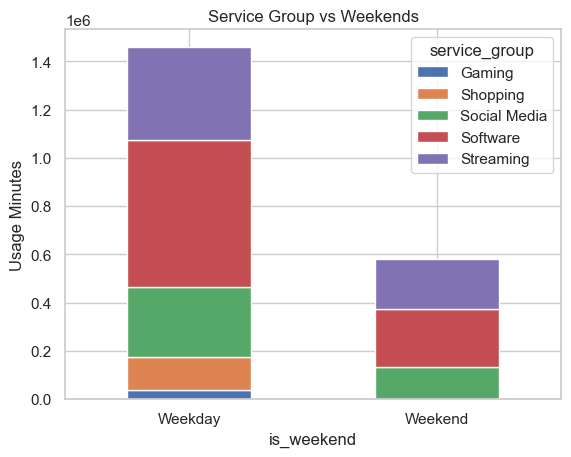

In [19]:
plt.figure(figsize=(12, 6))
df.groupby(['is_weekend', 'service_group'])['usage_minutes'].sum().unstack().plot(kind='bar', title="Service Group vs Weekends", ylabel="Usage Minutes", stacked=True)
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
#plt.savefig("service_group_vs_weekends.png")
plt.show()


In [20]:
## Max Usage by Service Group

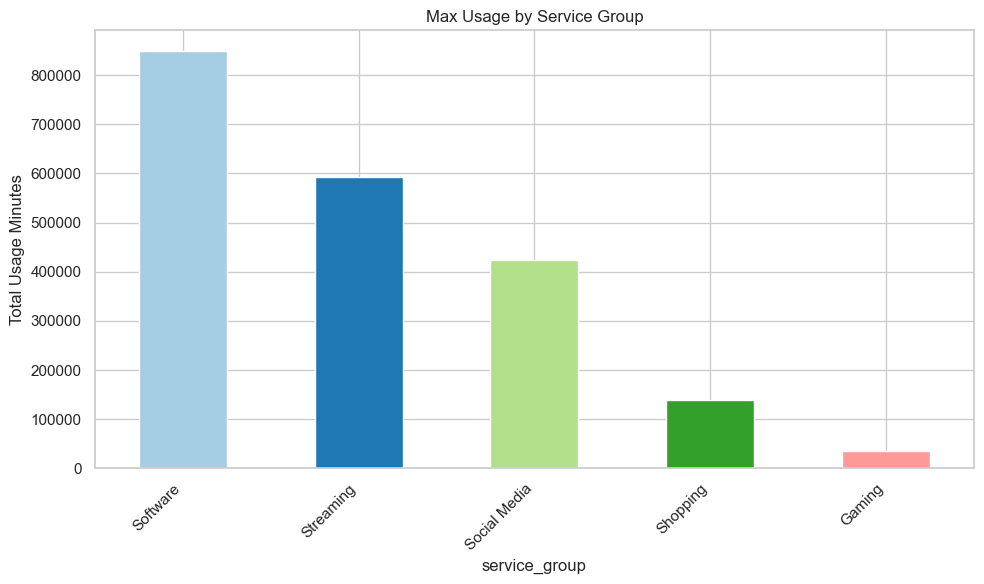

In [21]:
plt.figure(figsize=(10, 6))
usage_data = df.groupby('service_group')['usage_minutes'].sum().sort_values(ascending=False)
usage_data.plot(kind='bar', title="Max Usage by Service Group", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("max_usage_service_group.png")
plt.show()


In [22]:
## Min Usage by Service Group

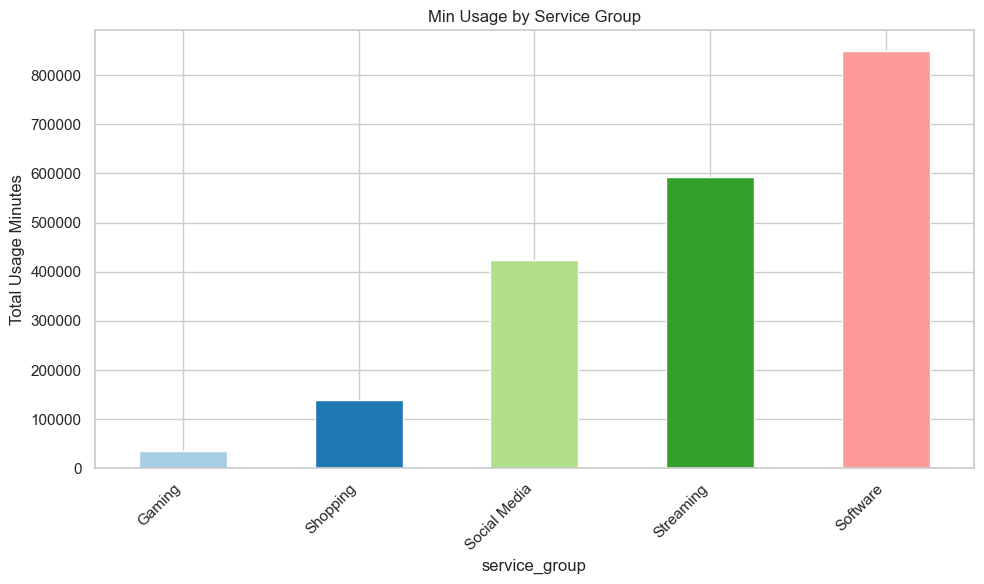

In [23]:
plt.figure(figsize=(10, 6))
usage_data = df.groupby('service_group')['usage_minutes'].sum().sort_values()
usage_data.plot(kind='bar', title="Min Usage by Service Group", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("min_usage_service_group.png")
plt.show()


In [24]:
## Max Usage by Service Name

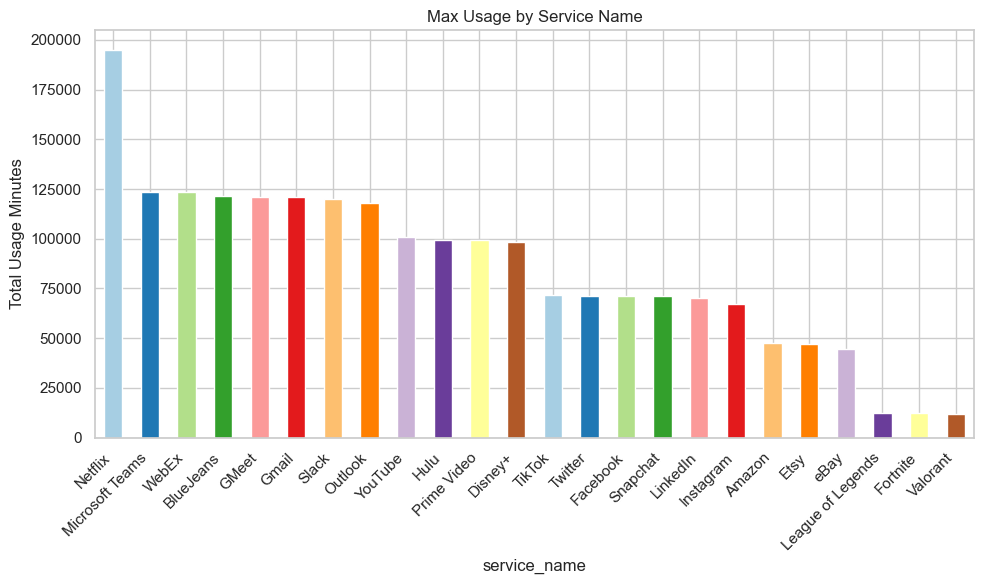

In [25]:
plt.figure(figsize=(10, 6))
usage_data = df.groupby('service_name')['usage_minutes'].sum().sort_values(ascending=False)
usage_data.plot(kind='bar', title="Max Usage by Service Name", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("max_usage_service_name.png")
plt.show()
